<a href="https://colab.research.google.com/github/Rachit2912/C-Basic-Practice-Programs/blob/main/ml_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

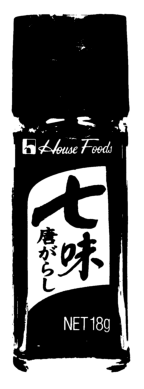

In [15]:
import requests
import cv2
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def fetch_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        image = Image.open(BytesIO(response.content))
        return image
    except Exception as e:
        print(f"Error fetching image: {e}")
        return None

def preprocess_image_for_ocr(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

    # Noise removal using Gaussian Blur
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Binarization using Otsu's thresholding
    _, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Optional: Invert the image if the text is white on black background
    # binary_image = cv2.bitwise_not(binary_image)

    # Resizing the image to make it easier for OCR
    resized_image = cv2.resize(binary_image, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

    return resized_image

def process_image_url(url):
    image = fetch_image(url)
    if image:
        preprocessed_image = preprocess_image_for_ocr(image)
        return preprocessed_image
    else:
        print("Image processing failed.")
        return None

# Example usage
image_url = 'https://m.media-amazon.com/images/I/71AwnXJWCIL.jpg'
preprocessed_image = process_image_url(image_url)

if preprocessed_image is not None:
    # Display the preprocessed image
    plt.imshow(preprocessed_image, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
else:
    print("No image to display.")
